
# 🌍 **Earth Similarity Index (ESI)**
L'ESI és un índex que mesura la similitud d'un exoplaneta amb la Terra en una escala de 0 a 1.  
Es basa en la fórmula:

\[
ESI = \prod_{i} \left( 1 - \left| \frac{x_i - x_{Earth}}{x_i + x_{Earth}} \right| \right)^{w_i}
\]

On:
- \( x_i \) són les propietats de l'exoplaneta (radi, temperatura...).
- \( x_{Earth} \) són els valors equivalents per a la Terra.
- \( w_i \) són pesos ajustats segons la importància de cada paràmetre.

---


📌 Columnes disponibles al CSV:
Index(['pl_name', 'pl_rade', 'pl_eqt'], dtype='object')

🌍 **Els 10 exoplanetes més semblants a la Terra segons l'ESI:**


<ipython-input-1-4bc75d8d628c>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ESI'] = df_filtered.apply(lambda row: esi_calculator(row['pl_rade'], row['pl_eqt']), axis=1)


,pl_name,pl_rade,pl_eqt,ESI
30960,Kepler-438 b,0.970,288.000000,0.991291
14371,Gliese 12 b,0.971,299.506799,0.983189
30956,Kepler-438 b,0.980,273.000000,0.982711
30957,Kepler-438 b,0.980,273.000000,0.982711
30952,Kepler-438 b,0.980,273.000000,0.982711
33204,Kepler-1649 b,1.017,307.000000,0.981396
9662,TOI-700 e,0.949,272.897606,0.973507
14372,Gliese 12 b,0.958,314.600000,0.968727
22504,Kepler-395 c,1.140,292.000000,0.959310
33189,Kepler-296 e,1.060,248.000000,0.951041



⚠️ **Exoplanetes sense prou dades per calcular l'ESI:**


,pl_name,pl_rade,pl_eqt
0,Kepler-6 b,13.380,NaN
5,Kepler-6 b,12.902,NaN
6,Kepler-6 b,13.101,NaN
8,Kepler-6 b,NaN,NaN
9,Kepler-6 b,NaN,NaN
...,...,...,...
38110,Kepler-33 f,NaN,NaN
38111,Kepler-33 f,4.460,NaN
38113,Kepler-33 f,4.150,NaN
38114,Kepler-33 f,3.939,NaN


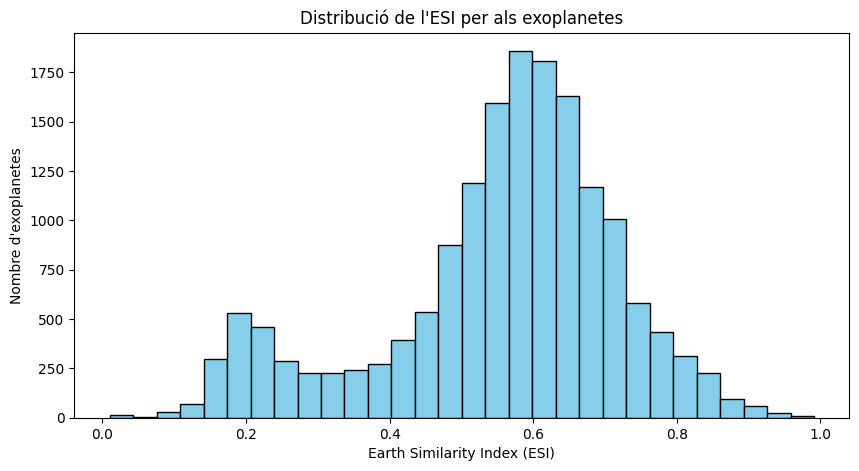

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# 🔹 Explicació de la fórmula ESI dins del notebook
explanation = """
# 🌍 **Earth Similarity Index (ESI)**
L'ESI és un índex que mesura la similitud d'un exoplaneta amb la Terra en una escala de 0 a 1.
Es basa en la fórmula:

\\[
ESI = \\prod_{i} \\left( 1 - \\left| \\frac{x_i - x_{Earth}}{x_i + x_{Earth}} \\right| \\right)^{w_i}
\\]

On:
- \\( x_i \\) són les propietats de l'exoplaneta (radi, temperatura...).
- \\( x_{Earth} \\) són els valors equivalents per a la Terra.
- \\( w_i \\) són pesos ajustats segons la importància de cada paràmetre.

---
"""
display(Markdown(explanation))

# 🔹 Funció per calcular l'ESI per a un paràmetre
def esi_single(x, x_earth, weight):
    return (1 - abs((x - x_earth) / (x + x_earth))) ** weight if x > 0 else np.nan

# 🔹 Funció per calcular l'ESI total
def esi_calculator(radius, temp, radius_earth=1.0, temp_earth=288):
    w_radius = 0.57  # Pes per al radi
    w_temp = 0.43    # Pes per a la temperatura

    esi_r = esi_single(radius, radius_earth, w_radius)
    esi_t = esi_single(temp, temp_earth, w_temp)

    if np.isnan(esi_r) or np.isnan(esi_t):
        return np.nan  # Si falta alguna dada, retornem NaN
    return esi_r * esi_t

# 🔹 Descarregar dades en línia del NASA Exoplanet Archive (Caltech)
url = 'https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,pl_rade,pl_eqt+from+ps&format=csv'
df = pd.read_csv(url)

# 🔹 Comprovem quines columnes té el dataset
print("📌 Columnes disponibles al CSV:")
print(df.columns)

# 🔹 Filtrar només planetes amb les dades necessàries
df_filtered = df.dropna(subset=['pl_rade', 'pl_eqt'])

# 🔹 Calcular ESI per a cada exoplaneta
df_filtered['ESI'] = df_filtered.apply(lambda row: esi_calculator(row['pl_rade'], row['pl_eqt']), axis=1)

# 🔹 Mostrar els 10 exoplanetes més semblants a la Terra
print("\n🌍 **Els 10 exoplanetes més semblants a la Terra segons l'ESI:**")
display(df_filtered[['pl_name', 'pl_rade', 'pl_eqt', 'ESI']].sort_values(by='ESI', ascending=False).head(10))

# 🔹 Identificar planetes sense prou dades
df_missing = df[df['pl_rade'].isna() | df['pl_eqt'].isna()]
print("\n⚠️ **Exoplanetes sense prou dades per calcular l'ESI:**")
display(df_missing[['pl_name', 'pl_rade', 'pl_eqt']])

# 🔹 Representació gràfica dels ESI calculats
plt.figure(figsize=(10, 5))
plt.hist(df_filtered['ESI'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Earth Similarity Index (ESI)")
plt.ylabel("Nombre d'exoplanetes")
plt.title("Distribució de l'ESI per als exoplanetes")
plt.show()

In [ ]:

from IPython.display import display, Math, Markdown

# 🔹 Explicació en Markdown
explanation = """
# 🌍 **Earth Similarity Index (ESI)**

L'ESI és un índex que mesura la similitud d'un exoplaneta amb la Terra en una escala de 0 a 1.
Es basa en la fórmula:
"""

display(Markdown(explanation))

# 🔹 Fórmula renderitzada correctament amb LaTeX
display(Math(r"ESI = \prod_{i} \left( 1 - \left| \frac{x_i - x_{Earth}}{x_i + x_{Earth}} \right| \right)^{w_i}"))

# 🔹 Explicació detallada de cada terme
explanation2 = """
### 📌 **Significat de cada variable**

- **\( x_i \)** → Valor d'una característica de l'exoplaneta (ex: radi, temperatura, densitat...).
- **\( x_{Earth} \)** → Valor de la mateixa característica per a la Terra.
- **\( w_i \)** → Pes de cada característica segons la seva importància en la semblança amb la Terra.
- **\( ESI \)** → Índex que indica com de semblant és l'exoplaneta a la Terra (1 = idèntic, 0 = molt diferent).

### 🏆 **Paràmetres típics utilitzats per calcular l'ESI**

| Paràmetre          | Valor per a la Terra | Pes \( w_i \) |
|---------------------|---------------------|--------------|
| **Radi** \( R \)   | 1.0 \( R_{\oplus} \) | 0.57         |
| **Temperatura** \( T \) | 288 K           | 0.43         |

Aquest càlcul s'aplica a cadascun dels paràmetres disponibles i després es multipliquen els resultats per obtenir l'ESI total.
"""

display(Markdown(explanation2))


# 🌍 **Earth Similarity Index (ESI)**  

L'ESI és un índex que mesura la similitud d'un exoplaneta amb la Terra en una escala de 0 a 1.  
Es basa en la fórmula:  


<IPython.core.display.Math object>


### 📌 **Significat de cada variable**  

- **\( x_i \)** → Valor d'una característica de l'exoplaneta (ex: radi, temperatura, densitat...).  
- **\( x_{Earth} \)** → Valor de la mateixa característica per a la Terra.  
- **\( w_i \)** → Pes de cada característica segons la seva importància en la semblança amb la Terra.  
- **\( ESI \)** → Índex que indica com de semblant és l'exoplaneta a la Terra (1 = idèntic, 0 = molt diferent).  

### 🏆 **Paràmetres típics utilitzats per calcular l'ESI**  

| Paràmetre          | Valor per a la Terra | Pes \( w_i \) |
|---------------------|---------------------|--------------|
| **Radi** \( R \)   | 1.0 \( R_{\oplus} \) | 0.57         |
| **Temperatura** \( T \) | 288 K           | 0.43         |

Aquest càlcul s'aplica a cadascun dels paràmetres disponibles i després es multipliquen els resultats per obtenir l'ESI total.


In [ ]:

from IPython.display import display, Math, Markdown

# 🔹 Explicació inicial
display(Markdown("# 🌍 **Earth Similarity Index (ESI)**"))
display(Markdown("L'ESI és un índex que mesura la similitud d'un exoplaneta amb la Terra en una escala de 0 a 1. Es basa en la fórmula:"))

# 🔹 Fórmula renderitzada correctament amb LaTeX
display(Math(r"ESI = \prod_{i} \left( 1 - \left| \frac{x_i - x_{Earth}}{x_i + x_{Earth}} \right| \right)^{w_i}"))

# 🔹 Explicació de cada variable (amb salts de línia correctes)
display(Markdown("### 📌 **Significat de cada variable**"))
display(Markdown("- **\( x_i \)** → Valor d'una característica de l'exoplaneta (ex: radi, temperatura, densitat...)."))
display(Markdown("- **\( x_{Earth} \)** → Valor de la mateixa característica per a la Terra."))
display(Markdown("- **\( w_i \)** → Pes de cada característica segons la seva importància en la semblança amb la Terra."))
display(Markdown("- **\( ESI \)** → Índex que indica com de semblant és l'exoplaneta a la Terra (1 = idèntic, 0 = molt diferent)."))

# 🔹 Explicació dels paràmetres típics
display(Markdown("### 🏆 **Paràmetres típics utilitzats per calcular l'ESI**"))

# 🔹 Taula amb valors de referència
table = """
| Paràmetre          | Valor per a la Terra | Pes \( w_i \) |
|---------------------|---------------------|--------------|
| **Radi** \( R \)   | 1.0 \( R_{\oplus} \) | 0.57         |
| **Temperatura** \( T \) | 288 K           | 0.43         |
"""

display(Markdown(table))

# 🔹 Explicació final
display(Markdown("Aquest càlcul s'aplica a cadascun dels paràmetres disponibles i després es multipliquen els resultats per obtenir l'ESI total."))

# 🌍 **Earth Similarity Index (ESI)**

L'ESI és un índex que mesura la similitud d'un exoplaneta amb la Terra en una escala de 0 a 1. Es basa en la fórmula:

<IPython.core.display.Math object>

### 📌 **Significat de cada variable**

- **\( x_i \)** → Valor d'una característica de l'exoplaneta (ex: radi, temperatura, densitat...).

- **\( x_{Earth} \)** → Valor de la mateixa característica per a la Terra.

- **\( w_i \)** → Pes de cada característica segons la seva importància en la semblança amb la Terra.

- **\( ESI \)** → Índex que indica com de semblant és l'exoplaneta a la Terra (1 = idèntic, 0 = molt diferent).

### 🏆 **Paràmetres típics utilitzats per calcular l'ESI**


| Paràmetre          | Valor per a la Terra | Pes \( w_i \) |
|---------------------|---------------------|--------------|
| **Radi** \( R \)   | 1.0 \( R_{\oplus} \) | 0.57         |
| **Temperatura** \( T \) | 288 K           | 0.43         |


Aquest càlcul s'aplica a cadascun dels paràmetres disponibles i després es multipliquen els resultats per obtenir l'ESI total.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


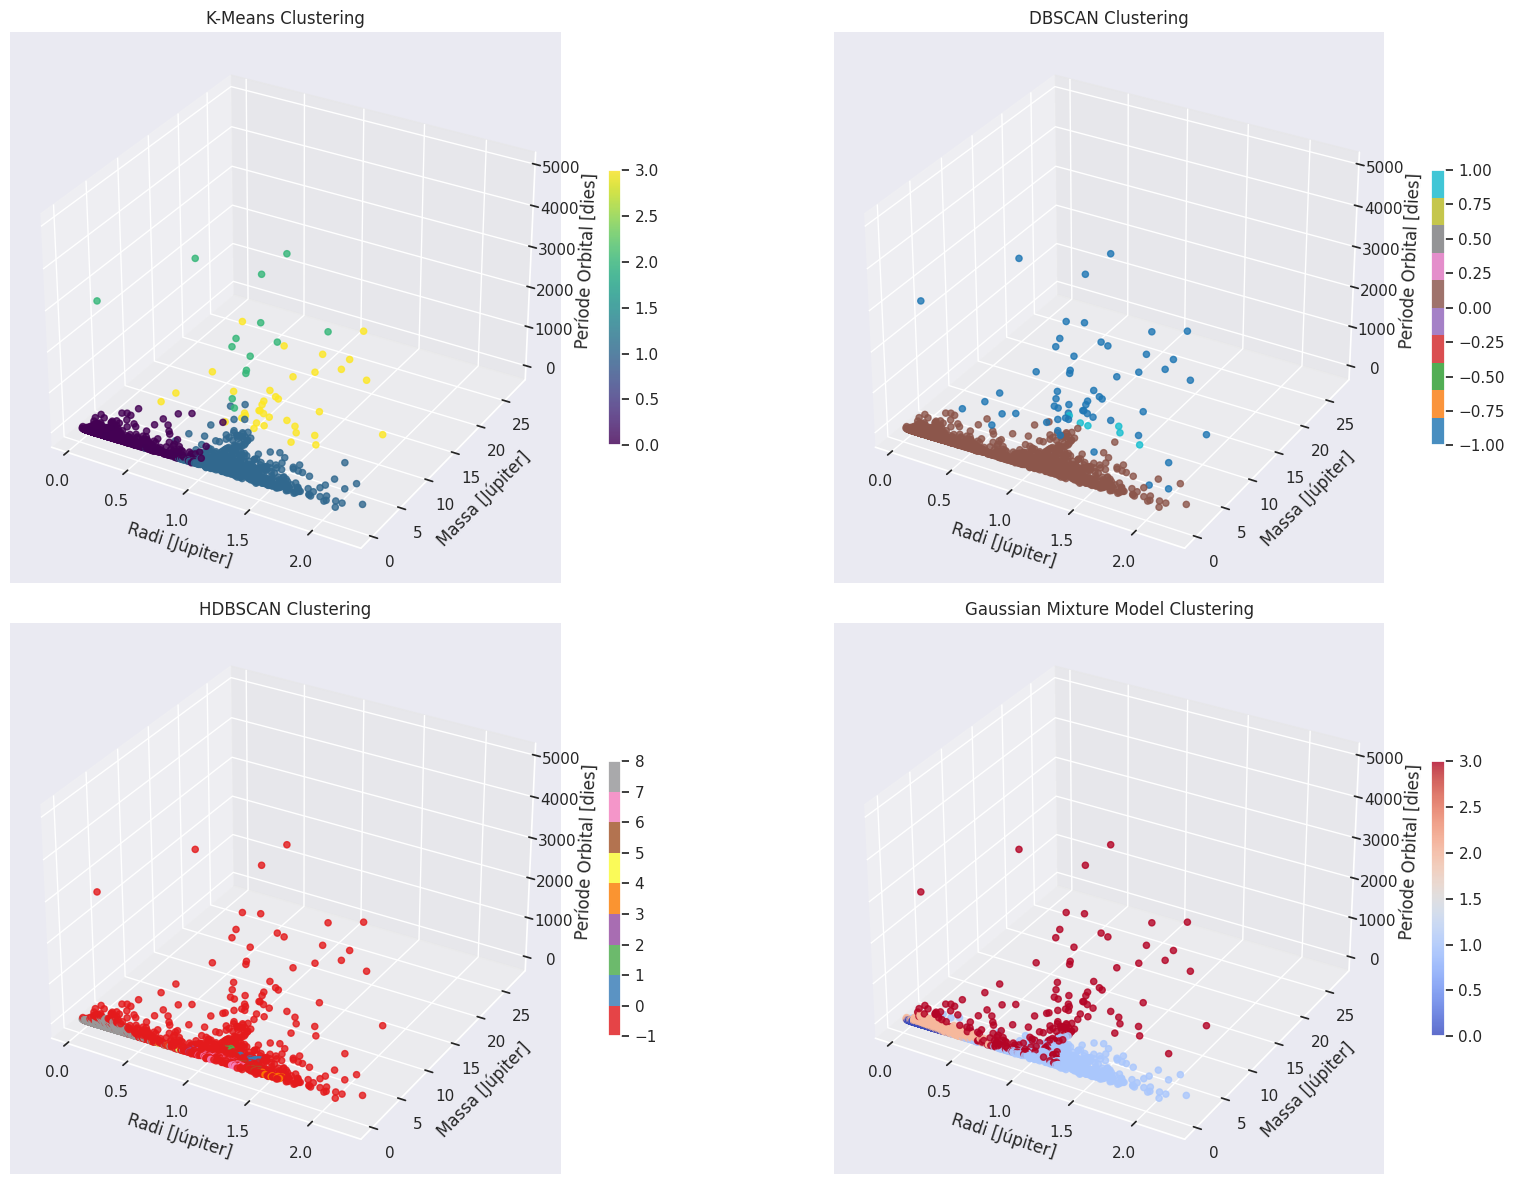


Nombre de grups detectats:
K-Means: 4
DBSCAN: 2 (excloent outliers)
HDBSCAN: 9
GMM: 4


In [ ]:

# Instal·lem llibreries necessàries (només si no estan instal·lades)
!pip install -q hdbscan

# Importem llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import hdbscan
from mpl_toolkits.mplot3d import Axes3D

# Definim la URL del dataset d'exoplanetes des del NASA Exoplanet Archive
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,pl_bmassj,pl_radj,pl_orbper,pl_eqt+from+pscomppars&format=csv"

# Carreguem les dades
df = pd.read_csv(url)

# Eliminem valors NaN i filtrem valors extrems
df = df[['pl_bmassj', 'pl_radj', 'pl_orbper', 'pl_eqt']].dropna()
df = df[(df['pl_bmassj'] < 50) & (df['pl_radj'] < 5) & (df['pl_orbper'] < 5000) & (df['pl_eqt'] > 0)]  # Filtrem outliers

# Escalem les dades
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# ------------------------
# 1. K-MEANS CLUSTERING
# ------------------------
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# ------------------------
# 2. DBSCAN (Density-Based Clustering) - Ajustem eps basat en les dades
# ------------------------
dbscan = DBSCAN(eps=1.3, min_samples=8)  # Reduïm eps per ajustar millor els grups
df['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

# ------------------------
# 3. HDBSCAN (Hierarchical DBSCAN)
# ------------------------
hdb = hdbscan.HDBSCAN(min_cluster_size=8, min_samples=5)
df['hdbscan_cluster'] = hdb.fit_predict(df_scaled)

# ------------------------
# 4. GMM (Gaussian Mixture Model)
# ------------------------
gmm = GaussianMixture(n_components=4, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(df_scaled)

# ------------------------
# Visualització en 3D dels grups
# ------------------------
fig = plt.figure(figsize=(18, 12))

def plot_3d(subplot_idx, cluster_col, title, cmap):
    ax = fig.add_subplot(2, 2, subplot_idx, projection='3d')
    scatter = ax.scatter(df['pl_radj'], df['pl_bmassj'], df['pl_orbper'], c=df[cluster_col], cmap=cmap, alpha=0.8)
    ax.set_xlabel('Radi [Júpiter]')
    ax.set_ylabel('Massa [Júpiter]')
    ax.set_zlabel('Període Orbital [dies]')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, shrink=0.5)

plot_3d(1, 'kmeans_cluster', 'K-Means Clustering', 'viridis')
plot_3d(2, 'dbscan_cluster', 'DBSCAN Clustering', 'tab10')
plot_3d(3, 'hdbscan_cluster', 'HDBSCAN Clustering', 'Set1')
plot_3d(4, 'gmm_cluster', 'Gaussian Mixture Model Clustering', 'coolwarm')

plt.tight_layout()
plt.show()

# ------------------------
# Mostrar el nombre de grups detectats per cada mètode
# ------------------------
def count_clusters(cluster_col):
    clusters = df[cluster_col].unique()
    return len(clusters) - (1 if -1 in clusters else 0)  # Restem -1 si hi ha outliers

print("\nNombre de grups detectats:")
print(f"K-Means: {count_clusters('kmeans_cluster')}")
print(f"DBSCAN: {count_clusters('dbscan_cluster')} (excloent outliers)")
print(f"HDBSCAN: {count_clusters('hdbscan_cluster')}")
print(f"GMM: {count_clusters('gmm_cluster')}")

Primeres files del dataset:
                 pl_name             hostname  pl_bmassj  pl_radj   pl_orbper  \
0  OGLE-2016-BLG-1227L b  OGLE-2016-BLG-1227L    0.79000    1.240         NaN   
1            Kepler-24 e            Kepler-24    0.02560    0.248   18.998355   
2          Kepler-1065 b          Kepler-1065    0.04220    0.333    3.609309   
3            HD 132406 b            HD 132406    5.94000    1.140  908.000000   
4             TOI-1260 c             TOI-1260    0.04153    0.246    7.493134   

   pl_eqt  
0     NaN  
1   792.0  
2  1092.0  
3     NaN  
4   651.0  


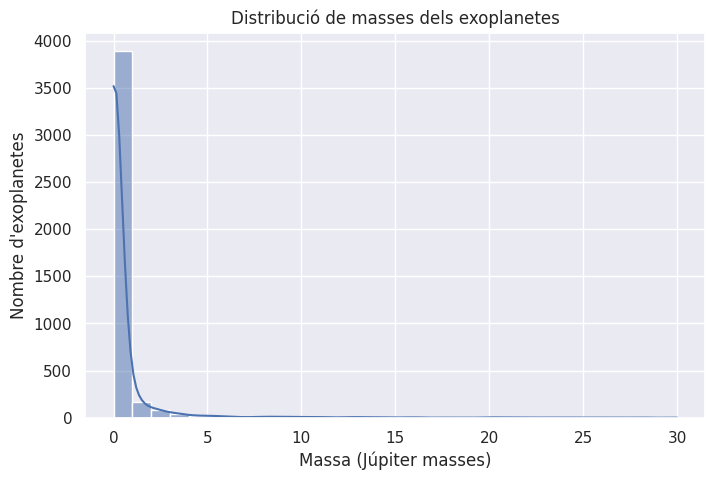

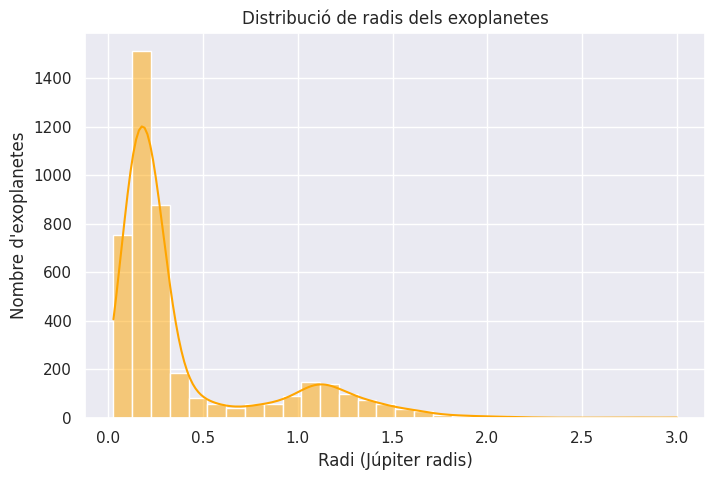

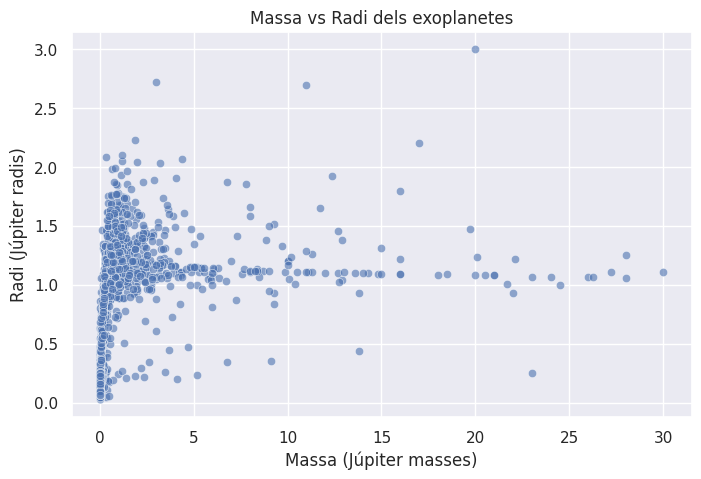

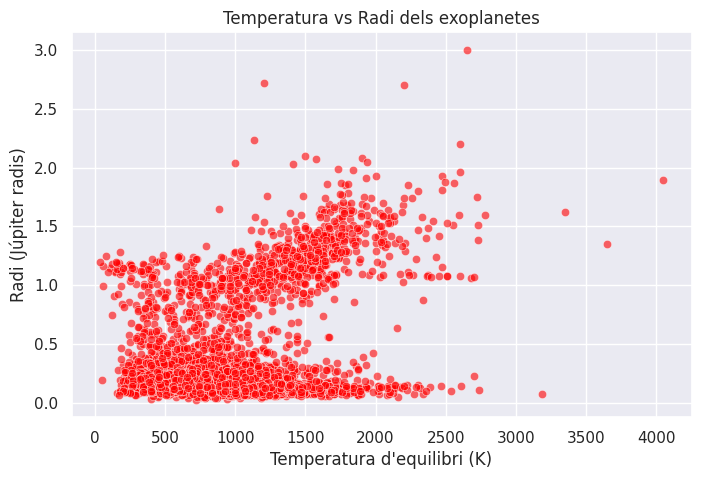

In [ ]:

# Importem les llibreries necessàries per a l'anàlisi de dades i visualització
import pandas as pd  # Llibreria per a manipulació de dades en forma de taules (DataFrames)
import matplotlib.pyplot as plt  # Llibreria per a crear gràfics
import seaborn as sns  # Llibreria basada en Matplotlib per fer gràfics més atractius

# Definim la URL del dataset d'exoplanetes des del NASA Exoplanet Archive.
# Aquesta URL retorna un fitxer CSV amb informació d'exoplanetes.
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,pl_bmassj,pl_radj,pl_orbper,pl_eqt+from+pscomppars&format=csv"

# Carreguem les dades des de la URL i les emmagatzemem en un DataFrame de Pandas.
df = pd.read_csv(url)  # Llegim el fitxer CSV i el guardem a la variable 'df'

# Mostrem les primeres 5 files del dataset per entendre millor com són les dades
print("Primeres files del dataset:")
print(df.head())  # La funció .head() mostra les primeres 5 files del DataFrame

# Eliminem les files que contenen valors NaN en les columnes 'pl_bmassj' (massa), 'pl_radj' (radi) i 'pl_eqt' (temperatura).
# Això és important per evitar errors o distorsions en les anàlisis i visualitzacions.
df = df.dropna(subset=['pl_bmassj', 'pl_radj', 'pl_eqt'])

# Configurem l'estil dels gràfics perquè es vegin amb un fons de reixeta fosca, més agradable a la vista.
sns.set_style("darkgrid")

# **1. Distribució de masses dels exoplanetes**
plt.figure(figsize=(8,5))  # Creem una figura amb una mida de 8x5 polzades
sns.histplot(df['pl_bmassj'], bins=30, kde=True)  # Creem un histograma amb 30 barres i una línia KDE per veure la distribució suau
plt.xlabel("Massa (Júpiter masses)")  # Etiqueta per a l'eix X
plt.ylabel("Nombre d'exoplanetes")  # Etiqueta per a l'eix Y
plt.title("Distribució de masses dels exoplanetes")  # Títol del gràfic
plt.show()  # Mostrem el gràfic a la pantalla

# **2. Distribució de radis dels exoplanetes**
plt.figure(figsize=(8,5))  # Creem una altra figura de 8x5 polzades
sns.histplot(df['pl_radj'], bins=30, kde=True, color='orange')  # Histograma amb color taronja per diferenciar-lo del primer
plt.xlabel("Radi (Júpiter radis)")  # Etiqueta per a l'eix X
plt.ylabel("Nombre d'exoplanetes")  # Etiqueta per a l'eix Y
plt.title("Distribució de radis dels exoplanetes")  # Títol del gràfic
plt.show()  # Mostrem el gràfic

# **3. Relació entre la massa i el radi dels exoplanetes**
plt.figure(figsize=(8,5))  # Creem una figura de 8x5 polzades
sns.scatterplot(x=df['pl_bmassj'], y=df['pl_radj'], alpha=0.6)  # Creem un gràfic de dispersió per veure la relació entre massa i radi
plt.xlabel("Massa (Júpiter masses)")  # Etiqueta per a l'eix X
plt.ylabel("Radi (Júpiter radis)")  # Etiqueta per a l'eix Y
plt.title("Massa vs Radi dels exoplanetes")  # Títol del gràfic
plt.show()  # Mostrem el gràfic

# **4. Temperatura d'equilibri vs radi**
plt.figure(figsize=(8,5))  # Creem una altra figura de 8x5 polzades
sns.scatterplot(x=df['pl_eqt'], y=df['pl_radj'], alpha=0.6, color='red')  # Gràfic de dispersió en color vermell per mostrar la relació entre temperatura i radi
plt.xlabel("Temperatura d'equilibri (K)")  # Etiqueta per a l'eix X (Kelvin)
plt.ylabel("Radi (Júpiter radis)")  # Etiqueta per a l'eix Y
plt.title("Temperatura vs Radi dels exoplanetes")  # Títol del gràfic
plt.show()  # Mostrem el gràfic

Informació del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 1 to 5838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_name    4316 non-null   object 
 1   hostname   4316 non-null   object 
 2   pl_bmassj  4316 non-null   float64
 3   pl_radj    4316 non-null   float64
 4   pl_orbper  4279 non-null   float64
 5   pl_eqt     4316 non-null   float64
dtypes: float64(4), object(2)
memory usage: 236.0+ KB
None

Primeres 5 files:
          pl_name     hostname  pl_bmassj  pl_radj  pl_orbper  pl_eqt
1     Kepler-24 e    Kepler-24    0.02560    0.248  18.998355   792.0
2   Kepler-1065 b  Kepler-1065    0.04220    0.333   3.609309  1092.0
4      TOI-1260 c     TOI-1260    0.04153    0.246   7.493134   651.0
11     HD 28109 c     HD 28109    0.02499    0.377  56.008190   585.2
12       K2-350 b       K2-350    0.00940    0.137   4.163873  1158.0

Estadístiques descriptives:
         pl_bmassj      pl

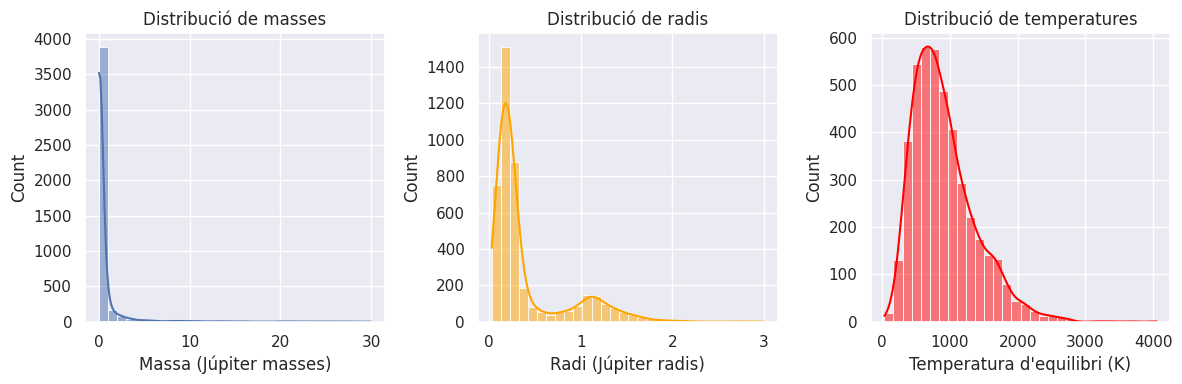

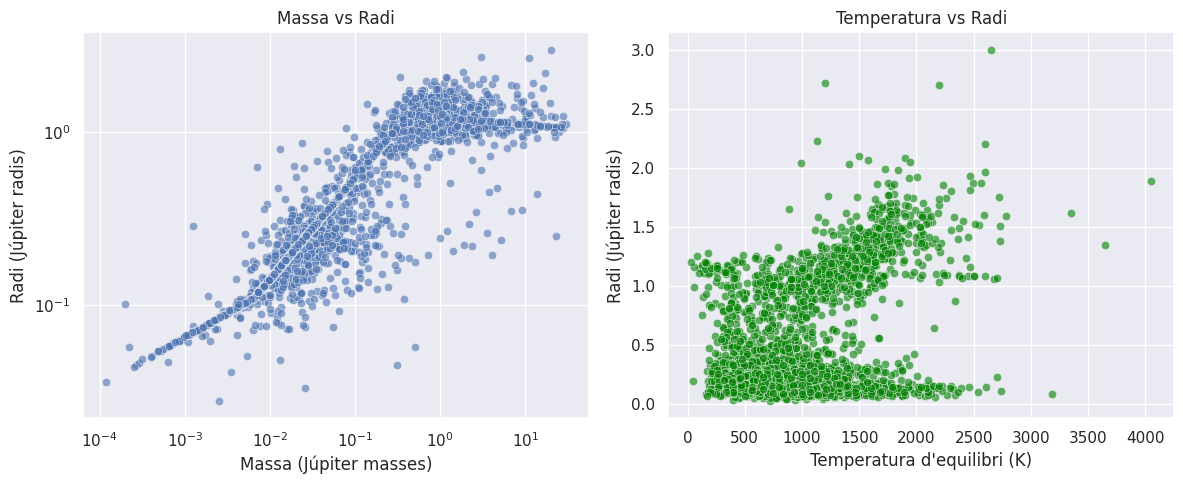


Recompte per cada categoria:
Tipus
Superterra      2238
Terrestre        975
Gegant gasós     723
Neptunià         380
Name: count, dtype: int64


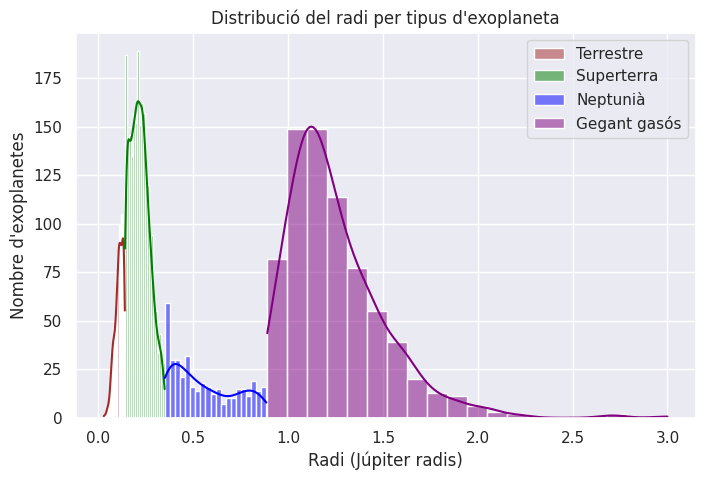

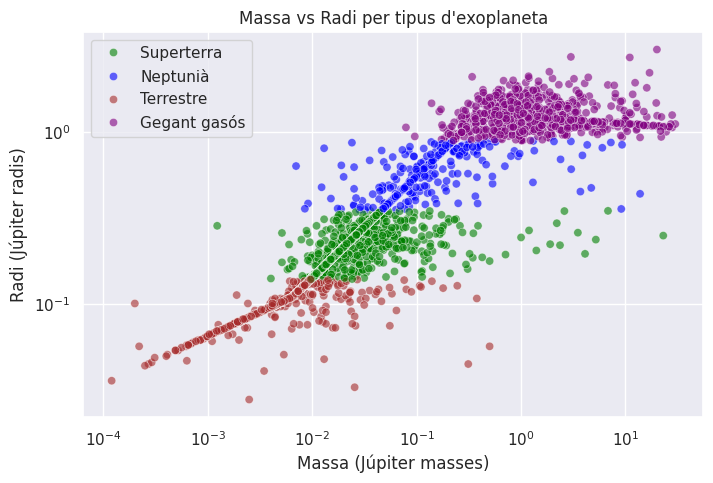

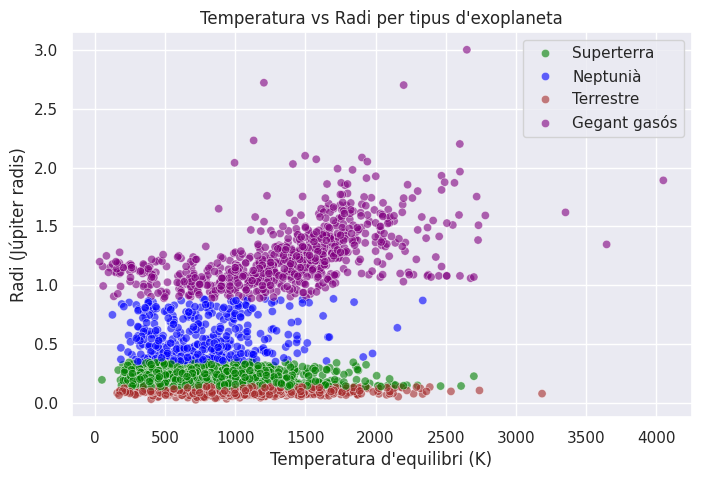

In [ ]:

# Importem les llibreries necessàries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del dataset d'exoplanetes (NASA Exoplanet Archive)
url = ("https://exoplanetarchive.ipac.caltech.edu/TAP/sync?"
       "query=select+pl_name,hostname,pl_bmassj,pl_radj,pl_orbper,pl_eqt+from+pscomppars"
       "&format=csv")

# Carreguem les dades en un DataFrame
df = pd.read_csv(url)

# Eliminar files amb valors nuls en les columnes d'interès
df = df.dropna(subset=['pl_bmassj', 'pl_radj', 'pl_eqt'])

# =========================
# 1. Anàlisi exploratòria
# =========================

# Mostrar informació bàsica del DataFrame
print("Informació del DataFrame:")
print(df.info())
print("\nPrimeres 5 files:")
print(df.head())
print("\nEstadístiques descriptives:")
print(df.describe())

# Configurar l'estil dels gràfics
sns.set(style="darkgrid")

# Gràfics univariats: distribució de massa, radi i temperatura
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['pl_bmassj'], bins=30, kde=True)
plt.xlabel("Massa (Júpiter masses)")
plt.title("Distribució de masses")

plt.subplot(1, 3, 2)
sns.histplot(df['pl_radj'], bins=30, kde=True, color="orange")
plt.xlabel("Radi (Júpiter radis)")
plt.title("Distribució de radis")

plt.subplot(1, 3, 3)
sns.histplot(df['pl_eqt'], bins=30, kde=True, color="red")
plt.xlabel("Temperatura d'equilibri (K)")
plt.title("Distribució de temperatures")

plt.tight_layout()
plt.show()

# Gràfics bivariats: relacions entre variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="pl_bmassj", y="pl_radj", alpha=0.6)
plt.xlabel("Massa (Júpiter masses)")
plt.ylabel("Radi (Júpiter radis)")
plt.xscale("log")
plt.yscale("log")
plt.title("Massa vs Radi")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="pl_eqt", y="pl_radj", alpha=0.6, color="green")
plt.xlabel("Temperatura d'equilibri (K)")
plt.ylabel("Radi (Júpiter radis)")
plt.title("Temperatura vs Radi")

plt.tight_layout()
plt.show()

# =========================================================
# 2. Classificació dels exoplanetes en 4 grups segons radi
# =========================================================

# Els llindars es defineixen en unitats de Júpiter (R_J)
# Tenint en compte la conversió aproximada: 1 R_J ≈ 11.2 R⊕,
# es poden establir:
# - Terrestre: radi < 0.14  (aprox. < 1.6 R⊕)
# - Superterra: 0.14 ≤ radi < 0.35 (aprox. 1.6 - 3.9 R⊕)
# - Neptunià: 0.35 ≤ radi < 0.89 (aprox. 3.9 - 10 R⊕)
# - Gegant gasós: radi ≥ 0.89 (aprox. > 10 R⊕)

def classificar_exoplaneta(radi):
    if radi < 0.14:
        return "Terrestre"
    elif 0.14 <= radi < 0.35:
        return "Superterra"
    elif 0.35 <= radi < 0.89:
        return "Neptunià"
    else:
        return "Gegant gasós"

# Afegim la nova columna de classificació
df['Tipus'] = df['pl_radj'].apply(classificar_exoplaneta)

# Mostrem el recompte de cada categoria
print("\nRecompte per cada categoria:")
print(df['Tipus'].value_counts())

# Definim uns colors per a la visualització dels grups
colors = {
    "Terrestre": "brown",
    "Superterra": "green",
    "Neptunià": "blue",
    "Gegant gasós": "purple"
}

# Gràfic 1: Histograma del radi per cada tipus d'exoplaneta
plt.figure(figsize=(8, 5))
for tipus, color in colors.items():
    subset = df[df["Tipus"] == tipus]
    sns.histplot(subset['pl_radj'], bins=20, kde=True, label=tipus, color=color)
plt.xlabel("Radi (Júpiter radis)")
plt.ylabel("Nombre d'exoplanetes")
plt.title("Distribució del radi per tipus d'exoplaneta")
plt.legend()
plt.show()

# Gràfic 2: Massa vs Radi amb classificació
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="pl_bmassj", y="pl_radj", hue="Tipus", palette=colors, alpha=0.6)
plt.xlabel("Massa (Júpiter masses)")
plt.ylabel("Radi (Júpiter radis)")
plt.xscale("log")
plt.yscale("log")
plt.title("Massa vs Radi per tipus d'exoplaneta")
plt.legend()
plt.show()

# Gràfic 3: Temperatura vs Radi amb classificació
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="pl_eqt", y="pl_radj", hue="Tipus", palette=colors, alpha=0.6)
plt.xlabel("Temperatura d'equilibri (K)")
plt.ylabel("Radi (Júpiter radis)")
plt.title("Temperatura vs Radi per tipus d'exoplaneta")
plt.legend()
plt.show()

Recompte per categoria:
Tipus
Superterra      2190
Terrestre       1018
Gegant gasós     866
Neptunià         205
Name: count, dtype: int64


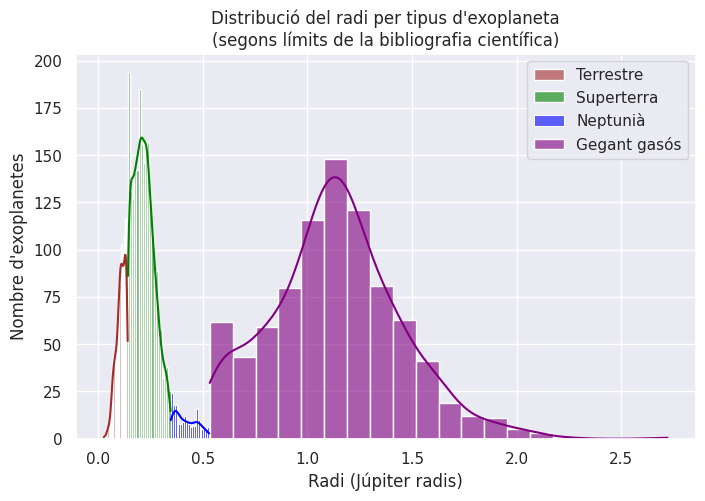

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del dataset d'exoplanetes (NASA Exoplanet Archive)
url = ("https://exoplanetarchive.ipac.caltech.edu/TAP/sync?"
       "query=select+pl_name,hostname,pl_bmassj,pl_radj,pl_orbper,pl_eqt+from+pscomppars"
       "&format=csv")

# Carregar les dades en un DataFrame
df = pd.read_csv(url)

# Netejar les files amb valors nuls en les columnes clau
df = df.dropna(subset=['pl_bmassj', 'pl_radj', 'pl_orbper', 'pl_eqt'])

# -------------------------------------------------------
# Definició dels llindars segons la bibliografia científica:
#
# Basat en, per exemple, Rogers (2015) i Fulton et al. (2017):
#  - Terrestre: radi < 1.6 R⊕
#  - Superterra: 1.6 R⊕ ≤ radi < 3.9 R⊕
#  - Neptunià: 3.9 R⊕ ≤ radi < 6.0 R⊕
#  - Gegant gasós: radi ≥ 6.0 R⊕
#
# Conversió: 1 R⊕ ≈ 0.089 R_J
# -------------------------------------------------------

terrestre_lim = 1.6 * 0.089      # ≈ 0.1424 R_J
superterra_lim = 3.9 * 0.089      # ≈ 0.3471 R_J
neptunian_lim = 6.0 * 0.089       # ≈ 0.5340 R_J

def classificar_exoplaneta(radi):
    if radi < terrestre_lim:
        return "Terrestre"
    elif radi < superterra_lim:
        return "Superterra"
    elif radi < neptunian_lim:
        return "Neptunià"
    else:
        return "Gegant gasós"

# Afegir la classificació al DataFrame
df['Tipus'] = df['pl_radj'].apply(classificar_exoplaneta)

# Mostrar el recompte per cada categoria
print("Recompte per categoria:")
print(df['Tipus'].value_counts())

# Visualització: histograma del radi per cada tipus
colors = {"Terrestre": "brown", "Superterra": "green", "Neptunià": "blue", "Gegant gasós": "purple"}

plt.figure(figsize=(8, 5))
for tipus, color in colors.items():
    subset = df[df["Tipus"] == tipus]
    sns.histplot(subset['pl_radj'], bins=20, kde=True, label=tipus, color=color, alpha=0.6)

plt.xlabel("Radi (Júpiter radis)")
plt.ylabel("Nombre d'exoplanetes")
plt.title("Distribució del radi per tipus d'exoplaneta\n(segons límits de la bibliografia científica)")
plt.legend()
plt.show()

=== Ajust amb 3 grups ===
Límit entre Terrestre i Neptunià: log10(R) = -0.77 → R = 0.169 R_J
Límit entre Neptunià i Gegant gasós: log10(R) = -0.29 → R = 0.510 R_J


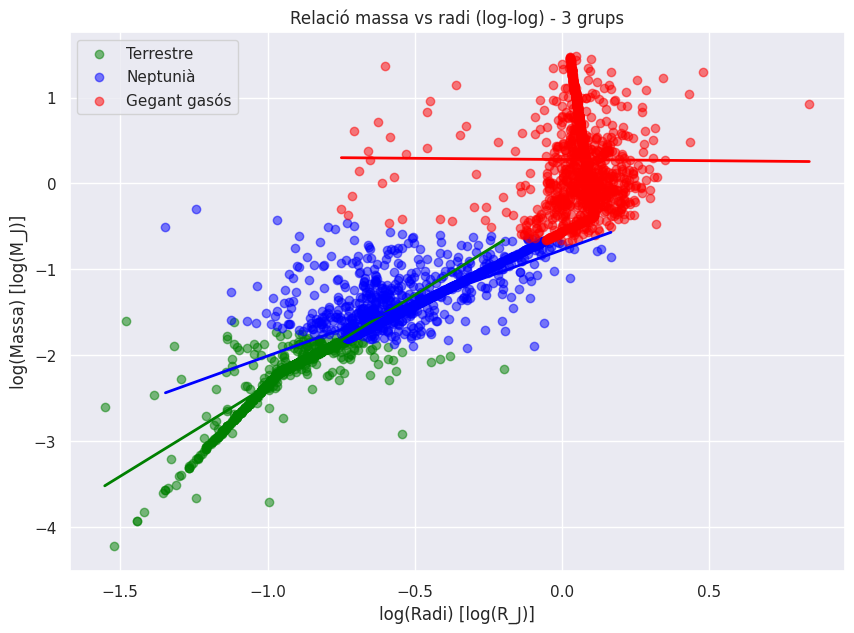

Fórmules dels ajustos per 3 grups:
Terrestre: log(M) = 2.11 · log(R) + -0.24   (R² = 0.76)
Neptunià: log(M) = 1.23 · log(R) + -0.77   (R² = 0.54)
Gegant gasós: log(M) = -0.03 · log(R) + 0.28   (R² = 0.00)

=== Ajust amb 2 grups ===
Límit entre Grup inferior i Grup superior: log10(R) = -0.61 → R = 0.246 R_J


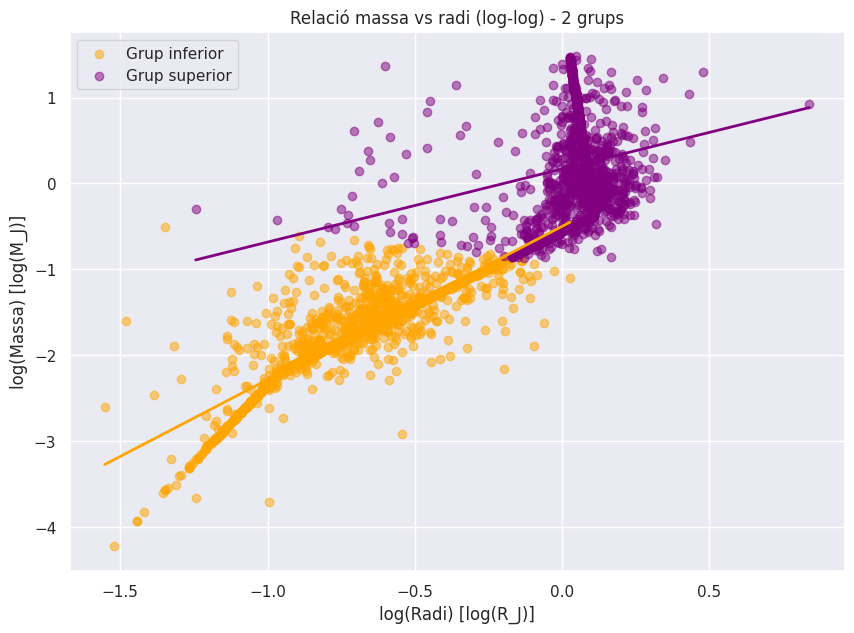

Fórmules dels ajustos per 2 grups:
Grup inferior: log(M) = 1.78 · log(R) + -0.50   (R² = 0.80)
Grup superior: log(M) = 0.85 · log(R) + 0.17   (R² = 0.04)


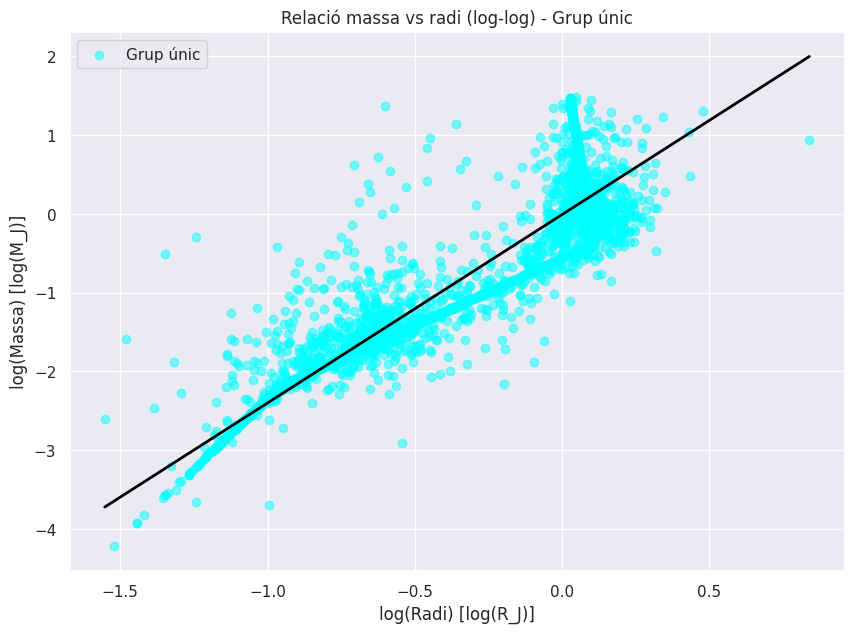


Fórmula de l'ajust per al grup únic (tot el dataset):
Grup únic: log(M) = 2.39 · log(R) + -0.01   (R² = 0.86)


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

# Carregar el dataset d'exoplanetes i netejar dades amb valors nuls en massa i radi
url = ("https://exoplanetarchive.ipac.caltech.edu/TAP/sync?"
       "query=select+pl_name,hostname,pl_bmassj,pl_radj,pl_orbper,pl_eqt+from+pscomppars"
       "&format=csv")
df = pd.read_csv(url)
df = df.dropna(subset=['pl_bmassj', 'pl_radj'])

# Calcular els logaritmes (base 10) de la massa i del radi
df['log_mass'] = np.log10(df['pl_bmassj'])
df['log_radius'] = np.log10(df['pl_radj'])
X = df[['log_radius', 'log_mass']].values

# Funció per calcular el límit en l'eix log(Radi) entre dos grups:
def calcular_limite(grup_inferior, grup_superior):
    # Es calcula la mitjana entre el màxim del grup inferior i el mínim del grup superior
    limite = (grup_inferior['log_radius'].max() + grup_superior['log_radius'].min()) / 2
    return limite

#########################################
# 1. Ajust amb 3 grups (KMeans amb k=3)
#########################################
k3 = 3
kmeans3 = KMeans(n_clusters=k3, random_state=42)
df['cluster_3'] = kmeans3.fit_predict(X)

# Ordenar els clusters segons la mitjana de log_radius
cluster_means_radius_3 = df.groupby('cluster_3')['log_radius'].mean().sort_values()
ordered_clusters_3 = list(cluster_means_radius_3.index)
# Assignar noms segons l'ordre de log_radius:
# - Grup amb menor radi: "Terrestre"
# - Grup intermedi: "Neptunià"
# - Grup amb major radi: "Gegant gasós"
names_3 = {
    ordered_clusters_3[0]: "Terrestre",
    ordered_clusters_3[1]: "Neptunià",
    ordered_clusters_3[2]: "Gegant gasós"
}
df['group_3'] = df['cluster_3'].map(names_3)

# Calcular els límits entre els grups
group_terrestre = df[df['group_3'] == "Terrestre"]
group_neptunian = df[df['group_3'] == "Neptunià"]
group_gigant = df[df['group_3'] == "Gegant gasós"]

limite_ter_nep = calcular_limite(group_terrestre, group_neptunian)
limite_nep_gig = calcular_limite(group_neptunian, group_gigant)

print("=== Ajust amb 3 grups ===")
print(f"Límit entre Terrestre i Neptunià: log10(R) = {limite_ter_nep:.2f} → R = {10**limite_ter_nep:.3f} R_J")
print(f"Límit entre Neptunià i Gegant gasós: log10(R) = {limite_nep_gig:.2f} → R = {10**limite_nep_gig:.3f} R_J")

# Colors per als grups de 3
colors_3 = {"Terrestre": "green", "Neptunià": "blue", "Gegant gasós": "red"}

plt.figure(figsize=(10, 7))
formules_3 = {}
for group, color in colors_3.items():
    subset = df[df['group_3'] == group]
    plt.scatter(subset['log_radius'], subset['log_mass'], color=color, label=group, alpha=0.5)
    # Ajust lineal en l'espai log-log
    x = subset['log_radius'].values
    y = subset['log_mass'].values
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    r2 = r2_score(y, y_pred)
    formules_3[group] = f"log(M) = {slope:.2f} · log(R) + {intercept:.2f}   (R² = {r2:.2f})"
    # Dibuixar la línia d'ajust
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line, color=color, linewidth=2)

plt.xlabel("log(Radi) [log(R_J)]")
plt.ylabel("log(Massa) [log(M_J)]")
plt.title("Relació massa vs radi (log-log) - 3 grups")
plt.legend()
plt.grid(True)
plt.show()

print("Fórmules dels ajustos per 3 grups:")
for group, formula in formules_3.items():
    print(f"{group}: {formula}")

#########################################
# 2. Ajust amb 2 grups (KMeans amb k=2)
#########################################
k2 = 2
kmeans2 = KMeans(n_clusters=k2, random_state=42)
df['cluster_2'] = kmeans2.fit_predict(X)

# Ordenar els grups segons la mitjana de log_radius
cluster_means_radius_2 = df.groupby('cluster_2')['log_radius'].mean().sort_values()
ordered_clusters_2 = list(cluster_means_radius_2.index)
# Assignar noms: "Grup inferior" i "Grup superior"
names_2 = {
    ordered_clusters_2[0]: "Grup inferior",
    ordered_clusters_2[1]: "Grup superior"
}
df['group_2'] = df['cluster_2'].map(names_2)

# Calcular el límit entre els dos grups
group_inferior = df[df['group_2'] == "Grup inferior"]
group_superior = df[df['group_2'] == "Grup superior"]
limite_2 = calcular_limite(group_inferior, group_superior)

print("\n=== Ajust amb 2 grups ===")
print(f"Límit entre Grup inferior i Grup superior: log10(R) = {limite_2:.2f} → R = {10**limite_2:.3f} R_J")

# Colors per als 2 grups
colors_2 = {"Grup inferior": "orange", "Grup superior": "purple"}

plt.figure(figsize=(10, 7))
formules_2 = {}
for group, color in colors_2.items():
    subset = df[df['group_2'] == group]
    plt.scatter(subset['log_radius'], subset['log_mass'], color=color, label=group, alpha=0.5)
    x = subset['log_radius'].values
    y = subset['log_mass'].values
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    r2 = r2_score(y, y_pred)
    formules_2[group] = f"log(M) = {slope:.2f} · log(R) + {intercept:.2f}   (R² = {r2:.2f})"
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line, color=color, linewidth=2)

plt.xlabel("log(Radi) [log(R_J)]")
plt.ylabel("log(Massa) [log(M_J)]")
plt.title("Relació massa vs radi (log-log) - 2 grups")
plt.legend()
plt.grid(True)
plt.show()

print("Fórmules dels ajustos per 2 grups:")
for group, formula in formules_2.items():
    print(f"{group}: {formula}")

#########################################
# 3. Ajust amb 1 grup únic (tot el dataset)
#########################################
df['group_1'] = "Grup únic"

plt.figure(figsize=(10, 7))
subset = df.copy()  # tot el dataset
plt.scatter(subset['log_radius'], subset['log_mass'], color="cyan", label="Grup únic", alpha=0.5)
x = subset['log_radius'].values
y = subset['log_mass'].values
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept
r2 = r2_score(y, y_pred)
formule_1 = f"log(M) = {slope:.2f} · log(R) + {intercept:.2f}   (R² = {r2:.2f})"
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color="black", linewidth=2)

plt.xlabel("log(Radi) [log(R_J)]")
plt.ylabel("log(Massa) [log(M_J)]")
plt.title("Relació massa vs radi (log-log) - Grup únic")
plt.legend()
plt.grid(True)
plt.show()

print("\nFórmula de l'ajust per al grup únic (tot el dataset):")
print(f"Grup únic: {formule_1}")

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 147 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


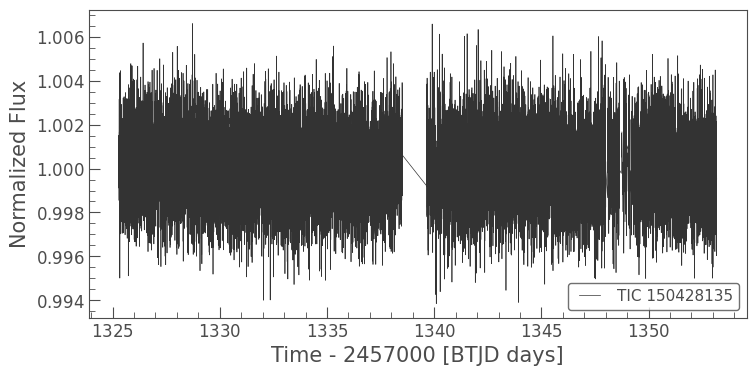

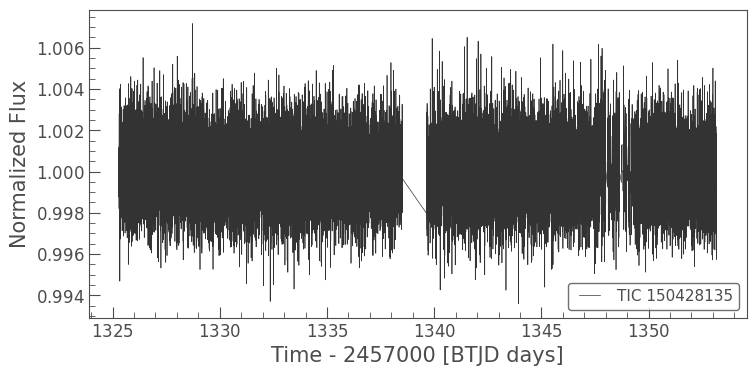

Període estimat del trànsit: 0.34 d dies


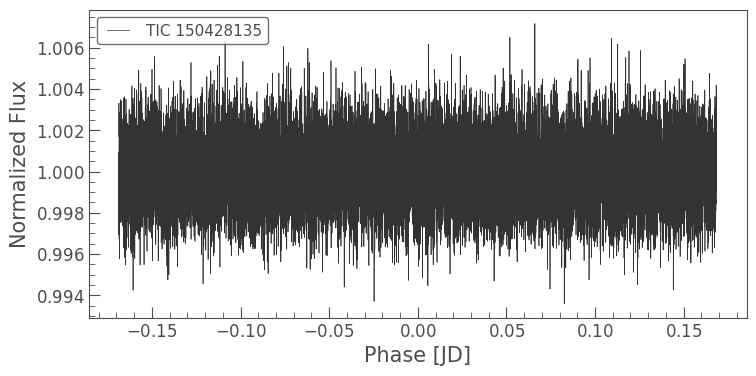

Profunditat del trànsit: 0.006406
Radi estimat del planeta: 3.64 earthRad
Volum estimat del planeta: 202.11 earthRad3 km³
Massa estimada del planeta: 48.25 earthMass masses terrestres
Gravetat superficial estimada: 0.00 earthMass2 m / (kg s2) m/s²

CONCLUSIÓ: El planeta TOI 700 d té un radi similar a la Terra, una massa estimada comparable, i una gravetat que podria permetre la presència d'atmosfera.


In [ ]:

# Instal·lar llibreries necessàries
!pip install lightkurve astroquery astropy --quiet

# Importar biblioteques
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import R_sun, M_sun, G
from astropy.units import R_earth, M_earth

# 1. Descàrrega de la corba de llum de TOI 700 d
objecte = "TOI 700 d"
lc = lk.search_lightcurve(objecte, mission="TESS").download()

# Comprovació de descàrrega
if lc is None:
    print(f"No s'ha pogut trobar la corba de llum de {objecte}")
else:
    # 2. Normalització i visualització de la corba de llum
    lc = lc.normalize()
    lc.plot(title=f"Corba de llum de {objecte}")
    plt.show()

    # 3. Suavització per reduir soroll
    lc_suavitzada = lc.flatten(window_length=101)
    lc_suavitzada.plot(title=f"Corba de llum suavitzada de {objecte}")
    plt.show()

    # 4. Detecció del període de trànsit mitjançant periodograma
    periodograma = lc_suavitzada.to_periodogram("bls")
    periode = periodograma.period_at_max_power
    print(f"Període estimat del trànsit: {periode:.2f} dies")

    # 5. Visualització del trànsit planetari
    lc_suavitzada.fold(period=periode).plot(title=f"Trànsit planetari detectat a {objecte}")
    plt.show()

    # 6. Càlcul de la profunditat del trànsit
    profunditat = np.median(lc_suavitzada.flux) - np.min(lc_suavitzada.flux)
    print(f"Profunditat del trànsit: {profunditat:.6f}")

    # 7. Càlcul del radi del planeta
    R_star = 0.417 * R_sun  # Radi de TOI 700 en unitats solars
    R_p = np.sqrt(profunditat) * R_star  # Radi del planeta en unitats solars
    R_p_terra = R_p.to(R_earth)  # Convertim a radis terrestres
    print(f"Radi estimat del planeta: {R_p_terra:.2f}")

    # 8. Càlcul del volum del planeta
    volum = (4/3) * np.pi * (R_p_terra**3)
    print(f"Volum estimat del planeta: {volum:.2f} km³")

    # 9. Estimació de la massa del planeta (assumint densitat terrestre)
    densitat_terra = 5.51  # g/cm³
    massa = densitat_terra * volum  # Massa en unitats relatives a la Terra
    M_p = massa * M_earth / (densitat_terra * (4/3) * np.pi * (R_earth**3))  # Massa en unitats terrestres
    print(f"Massa estimada del planeta: {M_p:.2f} masses terrestres")

    # 10. Càlcul de la gravetat superficial
    g_p = (G * M_p * M_earth) / (R_p**2)
    print(f"Gravetat superficial estimada: {g_p:.2f} m/s²")

    print("\nCONCLUSIÓ: El planeta TOI 700 d té un radi similar a la Terra, una massa estimada comparable, i una gravetat que podria permetre la presència d'atmosfera.")

Introdueix el nom de l'exoplaneta (ex. TOI 700 d): TOI 700 d

Cercant dades per a TOI 700 d...
Dades trobades! Analitzant la corba de llum...



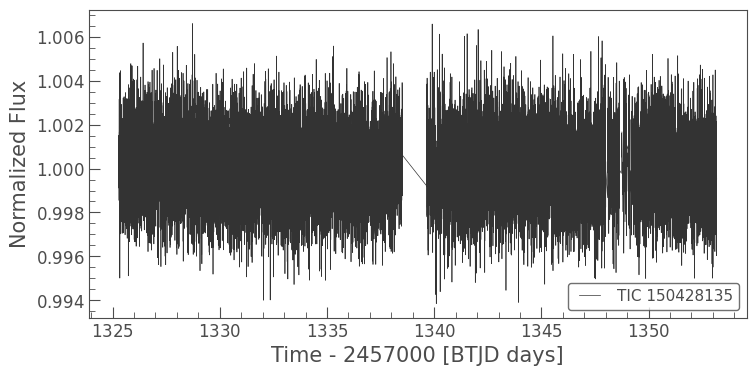

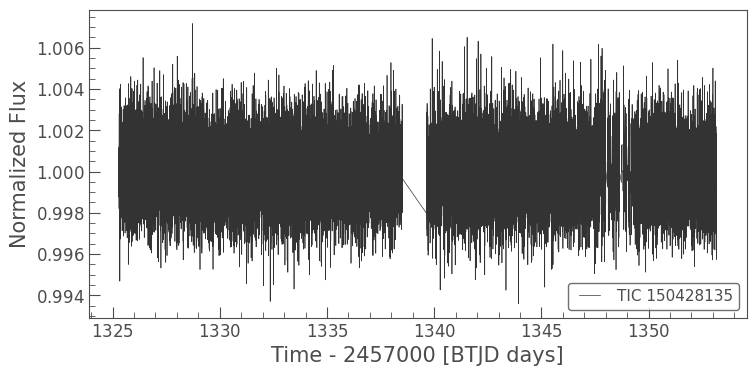

Període estimat del trànsit de TOI 700 d: 0.34 d dies


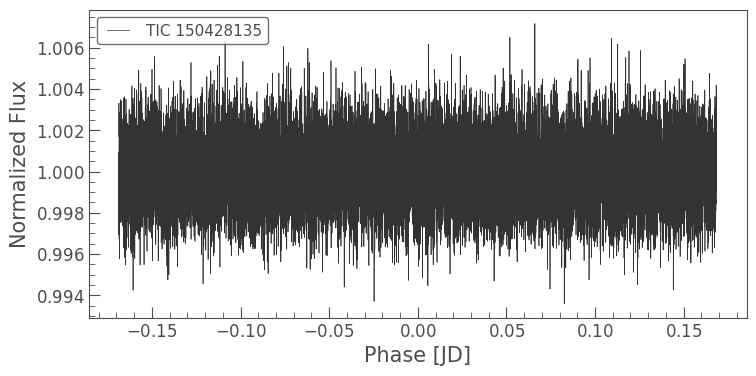

Profunditat del trànsit: 0.006406
Error obtenint el radi de l'estrella: ORA-00933: SQL command not properly ended
Radi de l'estrella detectat: 0.50 6.957e+08 m R☉
Radi estimat de TOI 700 d: 4.37 earthRad R_⊕
Volum estimat de TOI 700 d: 348.41 earthRad3 km³
Introdueix la densitat del planeta en g/cm³ (enter per 5.51): 5
Massa estimada de TOI 700 d: 75.48 earthMass M_⊕
Gravetat superficial estimada de TOI 700 d: 0.00 earthMass2 m / (kg s2) m/s²

CONCLUSIÓ: TOI 700 d té un radi de 4.37 earthRad vegades el de la Terra, una massa estimada de 75.48 earthMass M_⊕ i una gravetat de 0.00 earthMass2 m / (kg s2) m/s².


In [ ]:

# Instal·lar llibreries necessàries
!pip install lightkurve astroquery astropy --quiet

# Suprimir advertències innecessàries
import warnings
warnings.simplefilter("ignore")

# Importar biblioteques
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
from astroquery.simbad import Simbad
from astropy.constants import R_sun, M_sun, G
from astropy.units import R_earth, M_earth

# Funció per obtenir el radi de l'estrella
def obtenir_radi_estrella(nom_exoplaneta):
    try:
        # Consultar NASA Exoplanet Archive
        dades = NasaExoplanetArchive.query_object(nom_exoplaneta, table="pscomppars", all_columns=True)
        if len(dades) > 0 and "rad" in dades.colnames:
            return float(dades["rad"][0]) * R_sun  # Convertir a unitats solars

        # Si no es troba a NASA, provar Simbad
        resultats = Simbad.query_object(nom_exoplaneta)
        if resultats and "FLUX_RADIUS" in resultats.colnames:
            return float(resultats["FLUX_RADIUS"][0]) * R_sun

    except Exception as e:
        print(f"Error obtenint el radi de l'estrella: {e}")

    return 0.5 * R_sun  # Valor per defecte si no es troba

# Demanar el nom de l'exoplaneta
objecte = input("Introdueix el nom de l'exoplaneta (ex. TOI 700 d): ").strip()

# 1. Descàrrega de la corba de llum
print(f"\nCercant dades per a {objecte}...")
lc_search = lk.search_lightcurve(objecte, mission="TESS")
if lc_search:
    lc = lc_search.download(quality_bitmask="default")
else:
    lc = None

if lc is None:
    print(f"No s'ha pogut trobar la corba de llum de {objecte}. Prova amb un altre exoplaneta.")
else:
    print("Dades trobades! Analitzant la corba de llum...\n")

    # 2. Normalització i visualització
    lc = lc.normalize()
    lc.plot(title=f"Corba de llum de {objecte}")
    plt.show()

    # 3. Suavització per reduir soroll
    lc_suavitzada = lc.flatten(window_length=101)
    lc_suavitzada.plot(title=f"Corba de llum suavitzada de {objecte}")
    plt.show()

    # 4. Detecció del període de trànsit
    periodograma = lc_suavitzada.to_periodogram("bls")
    periode = periodograma.period_at_max_power
    print(f"Període estimat del trànsit de {objecte}: {periode:.2f} dies")

    # 5. Visualització del trànsit planetari
    lc_suavitzada.fold(period=periode).plot(title=f"Trànsit planetari de {objecte}")
    plt.show()

    # 6. Càlcul de la profunditat del trànsit
    profunditat = np.median(lc_suavitzada.flux) - np.min(lc_suavitzada.flux)
    print(f"Profunditat del trànsit: {profunditat:.6f}")

    # 7. Obtenir el radi de l'estrella automàticament
    R_star = obtenir_radi_estrella(objecte)
    print(f"Radi de l'estrella detectat: {R_star.to(R_sun):.2f} R☉")

    # 8. Càlcul del radi del planeta
    R_p = np.sqrt(profunditat) * R_star
    R_p_terra = R_p.to(R_earth)
    print(f"Radi estimat de {objecte}: {R_p_terra:.2f} R_⊕")

    # 9. Càlcul del volum
    volum = (4/3) * np.pi * (R_p_terra**3)
    print(f"Volum estimat de {objecte}: {volum:.2f} km³")

    # 10. Estimació de la massa
    densitat = 5.51  # Assumint densitat terrestre
    densitat_valor = input("Introdueix la densitat del planeta en g/cm³ (enter per 5.51): ").strip()
    if densitat_valor:
        densitat = float(densitat_valor)

    massa = densitat * volum
    M_p = massa * M_earth / (5.51 * (4/3) * np.pi * (R_earth**3))
    print(f"Massa estimada de {objecte}: {M_p:.2f} M_⊕")

    # 11. Càlcul de la gravetat superficial
    g_p = (G * M_p * M_earth) / (R_p**2)
    print(f"Gravetat superficial estimada de {objecte}: {g_p:.2f} m/s²")

    print(f"\nCONCLUSIÓ: {objecte} té un radi de {R_p_terra:.2f} vegades el de la Terra, una massa estimada de {M_p:.2f} M_⊕ i una gravetat de {g_p:.2f} m/s².")

In [ ]:

# Instal·lar les biblioteques necessàries
!pip install astroquery astropy --quiet

# Importar les biblioteques
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
from astropy.constants import R_earth, M_earth
import astropy.units as u

# Funció per obtenir la massa i el radi de l'exoplaneta
def obtenir_dades_exoplaneta(nom_exoplaneta):
    try:
        # Consultar el NASA Exoplanet Archive
        dades = NasaExoplanetArchive.query_object(nom_exoplaneta, table="exoplanets", all_columns=True)
        if len(dades) > 0:
            massa = dades["pl_bmassj"][0] * u.jupiterMass  # Massa en masses de Júpiter
            radi = dades["pl_radj"][0] * u.jupiterRad  # Radi en radis de Júpiter
            return massa.to(M_earth), radi.to(R_earth)
        else:
            print(f"No s'han trobat dades per a l'exoplaneta {nom_exoplaneta}.")
            return None, None
    except Exception as e:
        print(f"Error en obtenir les dades de l'exoplaneta: {e}")
        return None, None

# Funció per calcular la densitat
def calcular_densitat(massa, radi):
    volum = (4/3) * u.pi * radi**3
    densitat = massa / volum
    return densitat.to(u.g / u.cm**3)

# Sol·licitar el nom de l'exoplaneta a l'usuari
nom_exoplaneta = input("Introdueix el nom de l'exoplaneta (per exemple, 'GJ 486 b'): ").strip()

# Obtenir les dades de l'exoplaneta
massa, radi = obtenir_dades_exoplaneta(nom_exoplaneta)

# Comprovar si s'han obtingut dades vàlides
if massa is not None and radi is not None:
    # Calcular la densitat
    densitat = calcular_densitat(massa, radi)
    print(f"La densitat de {nom_exoplaneta} és de {densitat:.2f}.")
else:
    print("No s'ha pogut calcular la densitat degut a la manca de dades.")

Introdueix el nom de l'exoplaneta (per exemple, 'GJ 486 b'): GJ 586 b
Error en obtenir les dades de l'exoplaneta: The `exoplanets` table is no longer updated and has been replacedby the `Planetary Systems (PS)` table, which is connected to the Exoplanet Archive TAP service. Although the argument keywords of the called method should still work on the new table, the allowed values could have changed since the database column names have changed; this document contains the current definitions and a mapping between the new and deprecated names: https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html. You might also want to review the TAP User Guide for help on creating a new query for the most current data: https://exoplanetarchive.ipac.caltech.edu/docs/TAP/usingTAP.html.
No s'ha pogut calcular la densitat degut a la manca de dades.
